# Distance Matrix Pre-Processing and EDA

This is my playground for working with the pair-wise distance matrix exported from ML-DSP. Currently working with cyanobacterial sequences and proteobacterial sequences.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [4]:
def getDistances(disMatPath, cluster_label_1, cluster_label_2):
    """
    :param disMatPath: The path to the distance matrix exported from ML-DSP 
    :param cluster_label_1: Label of cluster 1(should be the name of folder you pass to ML-DSP GUI)
    :param cluster_label_2: Label of cluster 2(should be the name of folder you pass to ML-DSP GUI)
    
    :returns: returns two 1-dimensional array's that contains the distances within each cluster
    """
    # read in data and drop necessary columns and rows
    data = (pd.read_csv(disMatPath, header=None).drop(axis=0, index=1)
                    .drop(1, axis=1))
    
    # extract the distance matrix for the first cluster
    firstClusterDisMat = (data.loc[data.eq(cluster_label_1).any(), data.eq(cluster_label_1).any()]
                          .set_index(0).drop('ClusterName', axis=0).values
                          .astype(float))
    # get the indices for the upper triangular of our distance matrix
    upTriInd_1 = np.triu_indices(len(firstClusterDisMat))
    
    # get the values for the upper triangular
    clustOneDis = firstClusterDisMat[upTriInd_1]
    
    # remove all zeroes from this data (these are the values on diagonal which we don't need)
    clustOneDis = clustOneDis[clustOneDis != 0]
    
    ########################### REPEAT FOR CLUSTER 2 ###########################
    
    # extract the distance matrix for the first cluster
    secondClusterDisMat = (data.loc[data.eq(cluster_label_2).any(), data.eq(cluster_label_2).any()]
                          .set_index(0).drop('ClusterName', axis=0).values
                          .astype(float))
    # get the indices for the upper triangular of our distance matrix
    upTriInd_2 = np.triu_indices(len(secondClusterDisMat))
    
    # get the values for the upper triangular
    clustTwoDis = secondClusterDisMat[upTriInd_2]
    
    # remove all zeroes from this data (these are the values on diagonal which we don't need)
    clustTwoDis = clustTwoDis[clustTwoDis != 0]

    return clustOneDis, clustTwoDis


In [5]:
c, p = getDistances('disMat.csv', 'c', 'p')

In [93]:
c[0]

0.47964

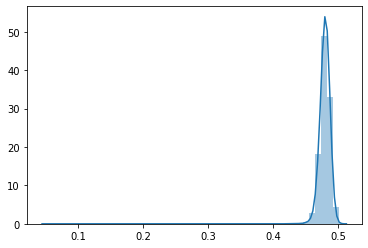

In [6]:
sns.distplot(c)

In [7]:
c.mean()

0.47947697739478967

In [8]:
c.std()

0.007951163185429709

In [10]:
p.mean()

0.4696762250759526

In [11]:
p.std()

0.009443544048325364

## New Function to Get the Intra-Cluster Distances for Each Cluster Label





In [6]:
path = 'disMat.csv'

def writeDistanceToCSV(disMatPath):
    """
    This function will take the path to the distance matrix that is exported from ML-DSP and 
    will create a .csv file containing the intra-cluster distances for each cluster. 
    
    :param disMatPath: Path to distance matrix from ML-DSP
    """
    # Read in data
    data = (pd.read_csv(disMatPath, header=None).drop(axis=0, index=1)
                    .drop(1, axis=1))
    # Get cluster labels from data 
    cluster_labels = data.iloc[0, 1:].unique()
    # initialize dataframe for output to .csv
    outData = pd.DataFrame()
    # for every cluster label 
    for label in cluster_labels:
        
        # extract the distance matrix for the cluster
        clusterDisMat = (data.loc[data.eq(label).any(), data.eq(label).any()]
                                  .set_index(0).drop('ClusterName', axis=0).values
                                  .astype(float))
    # get the indices for the upper triangular of our distance matrix
        upTriInd = np.triu_indices(len(clusterDisMat))
    
    # get the values for the upper triangular
        clusterDisMat = clusterDisMat[upTriInd]
    
    # remove all zeroes from data (these are the values on diagonal which we don't need)
        clusterData = clusterDisMat[clusterDisMat != 0]
        # put data into Series
        clusterData = pd.Series(clusterData)
        # add Series to DataFrame for output to .csv
        outData = pd.concat([outData, clusterData], ignore_index=True, axis=1)
    # set column names to cluster labels
    outData.columns = cluster_labels
    
    # write to csv
    outData.to_csv('clusterDistances.csv', index=False)
    
    return outData

writeDistanceToCSV(path)

,c,p
0,0.47964,0.47693
1,0.48729,0.47307
2,0.49059,0.47578
3,0.47815,0.47290
4,0.48949,0.47027
...,...,...
124745,0.48672,0.47080
124746,0.49253,0.45489
124747,0.48270,0.46901
124748,0.48837,0.47148


In [45]:
path = 'disMat.csv'

data = (pd.read_csv(path, header=None).drop(axis=0, index=1)
                    .drop(1, axis=1))
# Get cluster labels from data 
cluster_labels = data.iloc[0, 1:].unique()

paired_cluster_labels = list(itertools.combinations(cluster_labels, 2))

# initialize dataframe for output to .csv
outData = pd.DataFrame()

avg_distances_1 = []
avg_distances_2 = []

hold = None
# for every cluster label 
for pair in paired_cluster_labels:
    # put cluster labels into variables
    primary_cluster = pair[1]
    secondary_cluster = pair[0]
        
    
    # Get inter cluster distance matrix
    clusterDisMat_1 = (data.loc[data.eq(secondary_cluster).any(), data.eq(primary_cluster).any()]
                                .set_index(0).drop('ClusterName', axis=0)
                                .values
                                .astype(float))
    """
    clusterDisMat_2 = (data.loc[data.eq(primary_cluster).any(), data.eq(secondary_cluster).any()]
                                .set_index(0).drop('ClusterName', axis=0)
                                .values
                                .astype(float))
    """
    
    
    # for every point in the secondary cluster add the average distance from that 
    # point to every point in the primary cluster 
    
    for row in clusterDisMat_1:
        avg_distances_1.append(np.mean(row))
    
avg_distances_1 = sorted(avg_distances_1)

m = 20
   
"""
for row in clusterDisMat_2:
avg_distances_2.append(np.mean(row))
"""
    
        
        
    
    # get the indices for the upper triangular of our distance matrix
    #upTriInd = np.triu_indices(len(clusterDisMat))
    
    # get the values for the upper triangular
    #clusterDisMat = clusterDisMat[upTriInd]
    
    # remove all zeroes from data (these are the values on diagonal which we don't need)
    #clusterData = clusterDisMat[clusterDisMat != 0]
        # put data into Series
    #clusterData = pd.Series(clusterData)
        # add Series to DataFrame for output to .csv
    #outData = pd.concat([outData, clusterData], ignore_index=True, axis=1)
    # set column names to cluster labels
#outData.columns = cluster_labels

'\nfor row in clusterDisMat_2:\navg_distances_2.append(np.mean(row))\n'

In [42]:
avg_distances_1

[0.44255205999999997,
 0.46026118000000005,
 0.46110946,
 0.46143942,
 0.46150026000000005,
 0.46320256,
 0.46344894,
 0.46404996,
 0.46410591999999995,
 0.46466038000000004,
 0.46512191999999997,
 0.4659879,
 0.46673762,
 0.46717946,
 0.4682114,
 0.46862874,
 0.468859,
 0.469014,
 0.47027848,
 0.47033346,
 0.47052866,
 0.47054688,
 0.47078904,
 0.47080236000000003,
 0.47082806,
 0.47089874,
 0.47118578,
 0.47129832,
 0.47171926,
 0.47186746,
 0.47193498,
 0.47206197999999994,
 0.47252094,
 0.47255178000000003,
 0.47268642,
 0.4727331,
 0.4727374,
 0.4733141800000001,
 0.47337936,
 0.4734277,
 0.47360726,
 0.47367576,
 0.4737616,
 0.47376346,
 0.47386617999999997,
 0.47387660000000004,
 0.47396484,
 0.47418478000000003,
 0.47418816,
 0.47421574000000005,
 0.47423698000000003,
 0.47424671999999995,
 0.47424923999999996,
 0.4742741,
 0.47429566,
 0.47429928,
 0.47433982,
 0.47436576,
 0.47439084000000004,
 0.47441538,
 0.47445876,
 0.47447952,
 0.47455228,
 0.47456687999999997,
 0.474671

In [29]:
pd.DataFrame(hold)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.49039,0.48121,0.48335,0.49390,0.48778,0.48272,0.49187,0.48799,0.49186,0.48335,...,0.47413,0.48803,0.47606,0.47702,0.48049,0.49000,0.48150,0.47380,0.48846,0.48872
1,0.47357,0.48598,0.48015,0.48695,0.48404,0.48428,0.48639,0.48314,0.48706,0.47451,...,0.47422,0.48520,0.46846,0.46452,0.47926,0.46608,0.47392,0.47065,0.48533,0.47818
2,0.47859,0.47965,0.48618,0.48207,0.48895,0.48616,0.48348,0.48842,0.48806,0.47860,...,0.47579,0.48711,0.48176,0.47904,0.48683,0.48545,0.48503,0.46467,0.47783,0.48652
3,0.47540,0.48462,0.48966,0.48091,0.47625,0.48131,0.48124,0.48202,0.48699,0.47895,...,0.48197,0.48306,0.48305,0.48418,0.48328,0.47320,0.48591,0.46990,0.47749,0.48835
4,0.47981,0.47725,0.47871,0.48784,0.48616,0.48052,0.48473,0.47611,0.48855,0.47691,...,0.47826,0.47543,0.46506,0.47652,0.48243,0.47473,0.48505,0.47759,0.48061,0.48605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.46363,0.46784,0.48110,0.48215,0.47649,0.48068,0.47616,0.48773,0.48228,0.47120,...,0.47159,0.46655,0.48182,0.48202,0.48258,0.47184,0.48706,0.47040,0.48197,0.47606
496,0.47774,0.47749,0.48918,0.49106,0.48116,0.48561,0.48985,0.48976,0.48144,0.48000,...,0.49051,0.47995,0.47600,0.48098,0.47932,0.47933,0.48140,0.48260,0.48105,0.48412
497,0.48772,0.48770,0.48750,0.49027,0.48748,0.48253,0.49315,0.48915,0.48983,0.47633,...,0.47731,0.48835,0.48558,0.47997,0.48624,0.47751,0.47637,0.47908,0.49214,0.48670
498,0.47195,0.48071,0.48235,0.48069,0.47566,0.47898,0.47260,0.48403,0.48209,0.48291,...,0.46801,0.47273,0.46724,0.47664,0.47544,0.48430,0.48119,0.46683,0.48790,0.48288


In [19]:
len(avg_distances)

500

In [25]:
list(itertools.combinations([1,2,3], 2))

[(1, 2), (1, 3), (2, 3)]

In [60]:
def getInterDistancesv1(path):
    
    # Read in data
    data = (pd.read_csv(path, header=None).drop(axis=0, index=1)
                    .drop(1, axis=1))
    # Get cluster labels from data 
    cluster_labels = data.iloc[0, 1:].unique()
    

    paired_cluster_labels = list(itertools.combinations(cluster_labels, 2))

    # intialize list to hold average distances
    
    outData = pd.DataFrame()

    # for every pair of cluster labels 
    for pair in paired_cluster_labels:
        # put cluster labels into variables
        primary_cluster = pair[1]
        secondary_cluster = pair[0]
        
        print(pair)
        # Get inter cluster distance matrix
        clusterDisMat = (data.loc[data.eq(secondary_cluster).any(), data.eq(primary_cluster).any()]
                                    .set_index(0).drop('ClusterName', axis=0)
                                    .values
                                    .astype(float))

        # for every point in the secondary cluster add the average distance from that 
        # point to every point in the primary cluster 
        avg_distances = []
        
        for row in clusterDisMat:
            avg_distances.append(np.mean(row))
        

        avg_distances = sorted(avg_distances)
        
        clusterData = pd.Series(avg_distances)
        # add Series to DataFrame for output to .csv
        outData = pd.concat([outData, clusterData], ignore_index=True, axis=1)
        
    outData.columns = paired_cluster_labels
    
    return outData



In [61]:
getIntraDistances('distMat_ipoNUCLEAR_only.csv')



('ipo+', 'ipo-')
('ipo+', 'ipov_s12')
('ipo-', 'ipov_s12')


,"(ipo+, ipo-)","(ipo+, ipov_s12)","(ipo-, ipov_s12)"
0,0.370497,0.388402,0.388289
1,0.370505,0.389116,0.389811
2,0.370595,0.389734,0.389840
3,0.371322,0.389805,0.389878
4,0.372085,0.389871,0.390097
5,0.372525,0.390054,0.390384
6,0.372641,0.390597,0.390597
7,0.372769,0.391245,0.390690
8,0.373545,0.391361,0.391190
9,0.373564,0.391519,0.391453


In [176]:
def getInterDistancesNew(path, m=None):
    
    # Read in data
    data = (pd.read_csv(path, header=None).drop(axis=0, index=1)
                    .drop(1, axis=1))
    # Get cluster labels from data 
    cluster_labels = data.iloc[0, 1:].unique()
    
    # extract label row
    label_row = data.iloc[0, 1:]
    # find unique labels and number of elements in each cluster
    labels, counts = np.unique(label_row, return_counts=True)
    # find the index of the smallest cluster
    index_of_smallest_cluster = np.where(counts == np.amin(counts))[0][0]
    # get the length of the smallest cluster using the index above
    m = counts[index_of_smallest_cluster]
    # use index of smallest cluster to get the label of the primary cluster
    primary_cluster_label = labels[index_of_smallest_cluster]
    
    secondary_cluster_labels = cluster_labels[cluster_labels != primary_cluster_label]
    
    
    # intialize list to hold average distances
    
    outData = pd.DataFrame()
    
    for label in secondary_cluster_labels:
        
        # Get inter cluster distance matrix
        clusterDisMat = (data.loc[data.eq(label).any(), data.eq(primary_cluster_label).any()]
                                    .set_index(0).drop('ClusterName', axis=0)
                                    .values
                                    .astype(float))

        # for every point in the secondary cluster add the average distance from that 
        # point to every point in the primary cluster 
        avg_distances = []
        
        
        for row in clusterDisMat:
            avg_distances.append(np.mean(row))
        
        
        
        avg_distances = sorted(avg_distances)
        
        clusterData = pd.Series(avg_distances)
        # add Series to DataFrame for output to .csv
        outData = pd.concat([outData, clusterData], ignore_index=True, axis=1)
        
    outData.columns = [primary_cluster_label + ' vs. ' + secondary for secondary in secondary_cluster_labels]
    
    
    return outData

In [177]:
test = getInterDistancesNew('distMat_ipoNUCLEAR_only.csv')

In [178]:
test

,ipov_s12 vs. ipo+,ipov_s12 vs. ipo-
0,0.388402,0.388289
1,0.389116,0.389811
2,0.389734,0.389840
3,0.389805,0.389878
4,0.389871,0.390097
5,0.390054,0.390384
6,0.390597,0.390597
7,0.391245,0.390690
8,0.391361,0.391190
9,0.391519,0.391453


In [144]:
cluster_labels = test.iloc[0, 1:].unique()

In [146]:
cluster_labels[cluster_labels != 'ipov_s12']

array(['ipo+', 'ipo-'], dtype=object)

In [187]:
def getInterDistancesM(path, m):
    
    # Read in data
    data = (pd.read_csv(path, header=None).drop(axis=0, index=1)
                    .drop(1, axis=1))
    # Get cluster labels from data 
    cluster_labels = data.iloc[0, 1:].unique()
    
    # use index of smallest cluster to get the label of the primary cluster
    primary_cluster_label = cluster_labels[0]
    
    secondary_cluster_labels = cluster_labels[cluster_labels != primary_cluster_label]
    
    
    # intialize list to hold average distances
    
    outData = pd.DataFrame()
    
    for label in secondary_cluster_labels:
        
        # Get inter cluster distance matrix
        clusterDisMat = (data.loc[data.eq(label).any(), data.eq(primary_cluster_label).any()]
                                    .set_index(0).drop('ClusterName', axis=0)
                                    .values
                                    .astype(float))
        avg_distances = []
        count = 0

        for row in clusterDisMat:
            if count != m:
                avg_distances.append(np.mean(row[0:m]))
            else:
                break
            count += 1
            
        avg_distances = sorted(avg_distances)
        
        clusterData = pd.Series(avg_distances)
        # add Series to DataFrame for output to .csv
        outData = pd.concat([outData, clusterData], ignore_index=True, axis=1)
        
    outData.columns = [primary_cluster_label + ' vs. ' + secondary for secondary in secondary_cluster_labels]
    
    
    return outData

In [188]:
getInterDistancesM('distMat_ipoNUCLEAR_only.csv', 10)

,ipo+ vs. ipo-,ipo+ vs. ipov_s12
0,0.346506,0.384230
1,0.346596,0.384729
2,0.348498,0.385517
3,0.348577,0.386112
4,0.348845,0.388066
5,0.349027,0.393890
6,0.349304,0.395982
7,0.350042,0.397106
8,0.350237,0.399217
9,0.351997,0.402551


In [2]:
def getInterDistance(path, m=None):
    
    # Read in data
    data = (pd.read_csv(path, header=None).drop(axis=0, index=1)
                        .drop(1, axis=1))
    # Get cluster labels from data 
    cluster_labels = data.iloc[0, 1:].unique()
    
    # if m is not specified set m to be the size of the smallest cluster
    if m == None:

        # extract label row
        label_row = data.iloc[0, 1:]
        # find unique labels and number of elements in each cluster
        labels, counts = np.unique(label_row, return_counts=True)
        # find the index of the smallest cluster
        index_of_smallest_cluster = np.where(counts == np.amin(counts))[0][0]
        # get the length of the smallest cluster using the index above
        m = counts[index_of_smallest_cluster]
        # use index of smallest cluster to get the label of the primary cluster
        primary_cluster_label = labels[index_of_smallest_cluster]

        secondary_cluster_labels = cluster_labels[cluster_labels != primary_cluster_label]


        # intialize list to hold average distances

        outData = pd.DataFrame()

        for label in secondary_cluster_labels:

            # Get inter cluster distance matrix
            clusterDisMat = (data.loc[data.eq(label).any(), data.eq(primary_cluster_label).any()]
                                        .set_index(0).drop('ClusterName', axis=0)
                                        .values
                                        .astype(float))
            # intialize list to hold average distances 
            avg_distances = []
            # for every point in the secondary cluster add the average distance between the given point in 
            # the secondary cluster and all the points in the primary cluster
            for row in clusterDisMat:
                # each row contains the distances between single point in the secondary cluster to all the points 
                # in the primary cluster
                avg_distances.append(np.mean(row))


            # sort the avg_distances in ascending order
            avg_distances = sorted(avg_distances)

            clusterData = pd.Series(avg_distances)
            # add Series to DataFrame
            outData = pd.concat([outData, clusterData], ignore_index=True, axis=1)

        outData.columns = [primary_cluster_label + ' vs. ' + secondary for secondary in secondary_cluster_labels]
        
        return outData
    
    else:
        # Set primary cluster to be first cluster in distance matrix
        primary_cluster_label = cluster_labels[0]
        # Set secondary clusters to the other cluster labels
        secondary_cluster_labels = cluster_labels[cluster_labels != primary_cluster_label]


        # intialize DataFrame to hold average distance from each point in the secondary clusters 
        # to each point in the primary cluster 

        outData = pd.DataFrame()
        # for every cluster
        for label in secondary_cluster_labels:

            # Get inter cluster distance matrix for the secondary cluster and the primary cluster 
            clusterDisMat = (data.loc[data.eq(label).any(), data.eq(primary_cluster_label).any()]
                                        .set_index(0).drop('ClusterName', axis=0)
                                        .values
                                        .astype(float))
            # intialize list to hold average distances
            avg_distances = []
            # initialize count to prevent from exceeding m rows 
            count = 0
            # for every row in the interDistance Matrix 
            for row in clusterDisMat:
                # if we have not exceeded m rows -> add the average distance between the first point in 
                # secondary cluster and m points in the primary cluster
                if count < m:
                    avg_distances.append(np.mean(row[0:m]))
                # once we have iterated past m -> break the loop
                else:
                    break
                # increment the count var on every iteration 
                count += 1
            # sort the average distances in ascending order
            avg_distances = sorted(avg_distances)
            # put the avg_distances into a pandas series
            clusterData = pd.Series(avg_distances)
            # add Series to DataFrame for output to .csv
            outData = pd.concat([outData, clusterData], ignore_index=True, axis=1)
        # name the columns to describe what inter-cluster distances are contained in the column
        outData.columns = [primary_cluster_label + ' vs. ' + secondary for secondary in secondary_cluster_labels]
        
        return outData

In [3]:
getInterDistance('disMat.csv')

,c vs. p
0,0.468121
1,0.468214
2,0.470519
3,0.471220
4,0.471635
...,...
495,0.488524
496,0.488829
497,0.489157
498,0.489647


In [8]:
z = getInterDistance('distMat_ipoNUCLEAR_only.csv')

In [ ]:
z['']